In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
from scipy.stats import pearsonr
from scipy.stats import norm
from scipy import stats
import scipy as sp
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('city_stats.csv')

Dropping First column, land area ones since they came as blank

In [3]:
df.drop(columns = ['Unnamed: 0'],inplace=True)

In [4]:
df.head()

,CITY,STATE,PA,POP,UNDER_5,UNDER_18,65_OR_OVER,FEMALE,WHITE,BLACK,AMERICAN_INDIAN,ASIAN,PACIFIC_ISLANDER,MULTI_RACE,HISPANIC,VETERAN,FOREIGN,HOUSES,HOUSE_VAL,RENT,HOUSEHOLDS,PPH,YEAR_IN_HOUSE,OTHER_HOME_LANG,COMPUTER,INTERNET,HIGH_SCHOOL,BACH_DEGREE,DISABILITY_UNDER_65,NO_INSURANCE,LABOR,FEM_LABOR,HEALTHCARE,SHIPMENTS,TRAVEL_TIME,HOUSEHOLD_INCOME,INCOME,POVERTY,FIRMS,MEN_FIRM,FEM_FIRM,MINOR_FIRM,NON_MINOR_FIRM,VET_FIRM,NON_VET_FIRM,POP_AREA,AREA
0,Montgomery,Alabama,liberal,198218.0,6.8,24.0,13.7,53.0,33.3,60.6,0.2,2.8,0.0,1.9,3.6,14289.0,5.0,55.3,119600.0,867.0,79368.0,2.44,78.2,6.2,85.8,77.4,85.2,31.6,12.3,12.7,60.6,57.6,1759592.0,9125080.0,19.7,45921.0,27172.0,21.9,18043.0,8879.0,7459.0,8793.0,8363.0,2352.0,14434.0,1289.5,159.57
1,Birmingham,Alabama,liberal,209880.0,6.5,20.3,14.2,53.1,25.3,70.5,0.2,0.9,0.0,1.6,3.7,12801.0,3.7,45.8,89200.0,797.0,89880.0,2.26,79.3,5.2,81.5,68.7,86.1,26.0,13.9,15.1,60.0,58.6,5574098.0,4118352.0,21.8,35346.0,22993.0,27.2,20738.0,10318.0,8286.0,10605.0,8770.0,2082.0,17113.0,1453.0,146.07
2,Mobile,Alabama,liberal,189572.0,6.3,21.7,16.0,52.6,44.8,50.6,0.2,1.8,0.0,1.7,2.6,12292.0,3.4,53.9,121700.0,836.0,77668.0,2.37,84.8,4.7,81.6,70.0,88.5,28.5,9.9,13.6,56.5,54.7,2206244.0,3274416.0,22.4,40588.0,26023.0,22.0,20118.0,9703.0,8644.0,8808.0,10250.0,2275.0,16639.0,1402.6,139.11
3,Huntsville,Alabama,liberal,197318.0,6.4,21.1,15.7,51.9,61.6,30.6,0.4,2.7,0.1,2.9,6.0,17224.0,6.6,57.5,176100.0,804.0,82858.0,2.24,79.8,7.9,89.5,82.7,90.4,42.9,9.3,12.3,62.3,57.4,2268155.0,6213842.0,19.1,53840.0,34589.0,17.7,16838.0,8211.0,6565.0,4380.0,11515.0,1816.0,13915.0,861.5,209.05
4,Hoover,Alabama,liberal,85108.0,6.9,25.4,15.6,52.8,72.7,17.4,0.2,4.9,0.0,2.0,6.2,4608.0,9.5,69.1,280400.0,1100.0,32685.0,2.57,82.3,12.8,95.7,91.2,96.3,57.5,5.4,6.5,69.3,61.6,277598.0,49729.0,23.9,84042.0,43999.0,6.7,7982.0,4402.0,2471.0,1371.0,6147.0,831.0,6551.0,1730.6,47.16


In [5]:
df.shape

(4552, 47)

In [6]:
df.columns

Index(['CITY', 'STATE', 'PA', 'POP', 'UNDER_5', 'UNDER_18', '65_OR_OVER',
       'FEMALE', 'WHITE', 'BLACK', 'AMERICAN_INDIAN', 'ASIAN',
       'PACIFIC_ISLANDER', 'MULTI_RACE', 'HISPANIC', 'VETERAN', 'FOREIGN',
       'HOUSES', 'HOUSE_VAL', 'RENT', 'HOUSEHOLDS', 'PPH', 'YEAR_IN_HOUSE',
       'OTHER_HOME_LANG', 'COMPUTER', 'INTERNET', 'HIGH_SCHOOL', 'BACH_DEGREE',
       'DISABILITY_UNDER_65', 'NO_INSURANCE', 'LABOR', 'FEM_LABOR',
       'HEALTHCARE', 'SHIPMENTS', 'TRAVEL_TIME', 'HOUSEHOLD_INCOME', 'INCOME',
       'POVERTY', 'FIRMS', 'MEN_FIRM', 'FEM_FIRM', 'MINOR_FIRM',
       'NON_MINOR_FIRM', 'VET_FIRM', 'NON_VET_FIRM', 'POP_AREA', 'AREA'],
      dtype='object')

Checking for class imbalance

In [7]:
df['PA'].value_counts()

liberal         1915
conservative    1620
Name: PA, dtype: int64

Checking for null values

In [8]:
df.isnull().sum()

CITY                      0
STATE                     0
PA                     1017
POP                    1015
UNDER_5                1015
UNDER_18               1015
65_OR_OVER             1015
FEMALE                 1015
WHITE                  1015
BLACK                  1015
AMERICAN_INDIAN        1015
ASIAN                  1015
PACIFIC_ISLANDER       1015
MULTI_RACE             1015
HISPANIC               1015
VETERAN                1015
FOREIGN                1015
HOUSES                 1015
HOUSE_VAL              1015
RENT                   1015
HOUSEHOLDS             1015
PPH                    1015
YEAR_IN_HOUSE          1015
OTHER_HOME_LANG        1015
COMPUTER               1015
INTERNET               1015
HIGH_SCHOOL            1015
BACH_DEGREE            1015
DISABILITY_UNDER_65    1015
NO_INSURANCE           1015
LABOR                  1015
FEM_LABOR              1015
HEALTHCARE             1015
SHIPMENTS              1015
TRAVEL_TIME            1015
HOUSEHOLD_INCOME    

We are missing data for 1017 data points so dropping those rows

In [9]:
df.shape

(4552, 47)

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(3535, 47)

In [12]:
df.isnull().sum()

CITY                   0
STATE                  0
PA                     0
POP                    0
UNDER_5                0
UNDER_18               0
65_OR_OVER             0
FEMALE                 0
WHITE                  0
BLACK                  0
AMERICAN_INDIAN        0
ASIAN                  0
PACIFIC_ISLANDER       0
MULTI_RACE             0
HISPANIC               0
VETERAN                0
FOREIGN                0
HOUSES                 0
HOUSE_VAL              0
RENT                   0
HOUSEHOLDS             0
PPH                    0
YEAR_IN_HOUSE          0
OTHER_HOME_LANG        0
COMPUTER               0
INTERNET               0
HIGH_SCHOOL            0
BACH_DEGREE            0
DISABILITY_UNDER_65    0
NO_INSURANCE           0
LABOR                  0
FEM_LABOR              0
HEALTHCARE             0
SHIPMENTS              0
TRAVEL_TIME            0
HOUSEHOLD_INCOME       0
INCOME                 0
POVERTY                0
FIRMS                  0
MEN_FIRM               0


checking for values = 0

In [13]:
df.isin([0]).sum()

CITY                      0
STATE                     0
PA                        0
POP                       0
UNDER_5                   1
UNDER_18                  0
65_OR_OVER                0
FEMALE                    0
WHITE                     0
BLACK                    77
AMERICAN_INDIAN         640
ASIAN                   230
PACIFIC_ISLANDER       2249
MULTI_RACE               21
HISPANIC                 12
VETERAN                   0
FOREIGN                   5
HOUSES                    0
HOUSE_VAL                 6
RENT                      3
HOUSEHOLDS                0
PPH                       0
YEAR_IN_HOUSE             1
OTHER_HOME_LANG           1
COMPUTER                  0
INTERNET                  0
HIGH_SCHOOL               0
BACH_DEGREE               0
DISABILITY_UNDER_65       0
NO_INSURANCE              1
LABOR                     1
FEM_LABOR                 1
HEALTHCARE              720
SHIPMENTS              1464
TRAVEL_TIME               1
HOUSEHOLD_INCOME    

We're missing a lot of data for healthcare payments and manufacturing revenue so dropping those columns. We are also going to bin American Indian and Pacific Islander into 1/0
categories. We'll do 1/0 for greater than or less 1% population American Indian and 1/0 for non-zero pacific islander or 0%.

In [14]:
df.reset_index(inplace=True)

In [15]:

df.drop(columns = ['HEALTHCARE','SHIPMENTS','index'],inplace=True)


In [16]:
df['AMERICAN_INDIAN'].describe()

count    3535.000000
mean        0.865318
std         2.683266
min         0.000000
25%         0.100000
50%         0.300000
75%         0.700000
max        62.000000
Name: AMERICAN_INDIAN, dtype: float64

In [17]:
df['AMERICAN_INDIAN']=df['AMERICAN_INDIAN'].apply(lambda x: 1 if x>=.01 else 0 )

In [18]:
df['PACIFIC_ISLANDER'] = df['PACIFIC_ISLANDER'].apply(lambda x: 1 if x>0 else 0 )

We're missing a very small handful of data for columns like area/firms etc so going to drop those values now. There are only 8 total rows that will be dropped.


In [19]:
df = df[df['UNDER_5'] != 0]
df = df[df['AREA'] != 0]
df = df[df['FIRMS'] != 0]
df = df[df['POVERTY'] != 0]
df = df[df['FOREIGN'] != 0]
df = df[df['OTHER_HOME_LANG'] != 0]
df = df[df['HOUSE_VAL'] != 0]
df = df[df['RENT'] != 0]
df = df[df['HOUSEHOLD_INCOME'] != 0]

In [20]:
df.isin([0]).sum()

CITY                      0
STATE                     0
PA                        0
POP                       0
UNDER_5                   0
UNDER_18                  0
65_OR_OVER                0
FEMALE                    0
WHITE                     0
BLACK                    77
AMERICAN_INDIAN         633
ASIAN                   223
PACIFIC_ISLANDER       2233
MULTI_RACE               21
HISPANIC                 10
VETERAN                   0
FOREIGN                   0
HOUSES                    0
HOUSE_VAL                 0
RENT                      0
HOUSEHOLDS                0
PPH                       0
YEAR_IN_HOUSE             0
OTHER_HOME_LANG           0
COMPUTER                  0
INTERNET                  0
HIGH_SCHOOL               0
BACH_DEGREE               0
DISABILITY_UNDER_65       0
NO_INSURANCE              0
LABOR                     0
FEM_LABOR                 0
TRAVEL_TIME               0
HOUSEHOLD_INCOME          0
INCOME                    0
POVERTY             

We are still missing a lot of data for minority owned firm and veteran owned firm. Later
we will be converting these to % and then we will take the median % for that missing data.

Currently all of our data types are continuous, many of these we will
later bucket and categorize but first we'll take a look at the distributions


In [21]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3513 entries, 0 to 3534
Data columns (total 45 columns):
CITY                   3513 non-null object
STATE                  3513 non-null object
PA                     3513 non-null object
POP                    3513 non-null float64
UNDER_5                3513 non-null float64
UNDER_18               3513 non-null float64
65_OR_OVER             3513 non-null float64
FEMALE                 3513 non-null float64
WHITE                  3513 non-null float64
BLACK                  3513 non-null float64
AMERICAN_INDIAN        3513 non-null int64
ASIAN                  3513 non-null float64
PACIFIC_ISLANDER       3513 non-null int64
MULTI_RACE             3513 non-null float64
HISPANIC               3513 non-null float64
VETERAN                3513 non-null float64
FOREIGN                3513 non-null float64
HOUSES                 3513 non-null float64
HOUSE_VAL              3513 non-null float64
RENT                   3513 non-null float64


## Outliers
Currently all of our features are continuous. We'll start looking at these in detail

In [22]:
continuous = ['POP', 'UNDER_5', 'UNDER_18', '65_OR_OVER','FEMALE', 'WHITE', 'BLACK',
         'ASIAN', 'MULTI_RACE', 'HISPANIC', 'VETERAN', 'FOREIGN',
       'HOUSES', 'HOUSE_VAL', 'RENT', 'HOUSEHOLDS', 'PPH', 'YEAR_IN_HOUSE',
       'OTHER_HOME_LANG', 'COMPUTER', 'INTERNET', 'HIGH_SCHOOL', 'BACH_DEGREE',
       'DISABILITY_UNDER_65', 'NO_INSURANCE', 'LABOR', 'FEM_LABOR', 'TRAVEL_TIME', 'HOUSEHOLD_INCOME', 'INCOME',
       'POVERTY', 'FIRMS', 'MEN_FIRM', 'FEM_FIRM', 'MINOR_FIRM',
       'NON_MINOR_FIRM', 'VET_FIRM', 'NON_VET_FIRM', 'POP_AREA', 'AREA']


for column in continuous:
    print(df[column].describe())
    print('\n')

count    3.513000e+03
mean     4.730762e+04
std      1.918829e+05
min      5.018000e+03
25%      9.239000e+03
50%      1.736600e+04
75%      3.990800e+04
max      8.398748e+06
Name: POP, dtype: float64


count    3513.000000
mean        6.463222
std         1.674183
min         0.300000
25%         5.400000
50%         6.400000
75%         7.500000
max        15.400000
Name: UNDER_5, dtype: float64


count    3513.000000
mean       23.526103
std         4.842564
min         3.900000
25%        20.700000
50%        23.500000
75%        26.300000
max        47.200000
Name: UNDER_18, dtype: float64


count    3513.000000
mean       15.472644
std         5.241071
min         2.100000
25%        12.100000
50%        15.200000
75%        18.100000
max        61.900000
Name: 65_OR_OVER, dtype: float64


count    3513.000000
mean       51.212667
std         2.885521
min        21.100000
25%        50.200000
50%        51.400000
75%        52.600000
max        72.900000
Name: FEMALE, dtype: flo

The percentages are in whole numbers so we're going to turn them into
percentages by dividing by 100

In [23]:
percentages = ['UNDER_5', 'UNDER_18', '65_OR_OVER','FEMALE', 'WHITE', 'BLACK',
         'ASIAN', 'MULTI_RACE', 'HISPANIC','FOREIGN', 'HOUSES','YEAR_IN_HOUSE',
       'OTHER_HOME_LANG', 'COMPUTER', 'INTERNET','HIGH_SCHOOL', 'BACH_DEGREE',
       'DISABILITY_UNDER_65', 'NO_INSURANCE', 'LABOR', 'FEM_LABOR', 'POVERTY']
for column in percentages:
    df[column]=df[column]/100
    print(df[column].describe())
    print('\n')

count    3513.000000
mean        0.064632
std         0.016742
min         0.003000
25%         0.054000
50%         0.064000
75%         0.075000
max         0.154000
Name: UNDER_5, dtype: float64


count    3513.000000
mean        0.235261
std         0.048426
min         0.039000
25%         0.207000
50%         0.235000
75%         0.263000
max         0.472000
Name: UNDER_18, dtype: float64


count    3513.000000
mean        0.154726
std         0.052411
min         0.021000
25%         0.121000
50%         0.152000
75%         0.181000
max         0.619000
Name: 65_OR_OVER, dtype: float64


count    3513.000000
mean        0.512127
std         0.028855
min         0.211000
25%         0.502000
50%         0.514000
75%         0.526000
max         0.729000
Name: FEMALE, dtype: float64


count    3513.000000
mean        0.760486
std         0.189833
min         0.011000
25%         0.667000
50%         0.820000
75%         0.906000
max         0.995000
Name: WHITE, dtype: float64



Turning veteran into % of population 

In [24]:
df['VETERAN'] = (df['VETERAN']/df['POP'])

Most of the business counts by category can be interprolated from 
the others so removing them for multi-collinearity. People per household and Population per square mile can also be interprolated so dropping them.

In [25]:
df.drop(columns = ['PPH','MEN_FIRM','NON_MINOR_FIRM','NON_VET_FIRM'],inplace=True)




Turning columns where we have counts and total into % to standardize
a bit

In [26]:
df['FEM_FIRM']=df['FEM_FIRM']/df['FIRMS']
df['MINOR_FIRM']=df['MINOR_FIRM']/df['FIRMS']
df['VET_FIRM']=df['VET_FIRM']/df['FIRMS']



df['VET_FIRM'] = df['VET_FIRM'].apply(lambda x: np.median(df['VET_FIRM']) if x==0 else x)
df['MINOR_FIRM'] = df['MINOR_FIRM'].apply(lambda x: np.median(df['MINOR_FIRM']) if x==0 else x)

We dont need city or state anymore as they are just identifiers and potentially overpower local politics too much

In [27]:
df.drop(columns = ['CITY','STATE'],inplace=True)

In [28]:
#new continuous columns list
continuous = ['POP','UNDER_5', 'UNDER_18', '65_OR_OVER','FEMALE', 'WHITE', 'BLACK',
         'ASIAN', 'MULTI_RACE', 'HISPANIC', 'VETERAN', 'FOREIGN', 'HOUSES',
        'HOUSE_VAL', 'RENT', 'HOUSEHOLDS','YEAR_IN_HOUSE','OTHER_HOME_LANG', 
        'COMPUTER', 'INTERNET', 'HIGH_SCHOOL', 'BACH_DEGREE', 'DISABILITY_UNDER_65',
        'NO_INSURANCE', 'LABOR', 'FEM_LABOR', 'TRAVEL_TIME', 'HOUSEHOLD_INCOME', 'INCOME',
       'POVERTY', 'FIRMS', 'FEM_FIRM', 'MINOR_FIRM','VET_FIRM','AREA']



With Outliers:


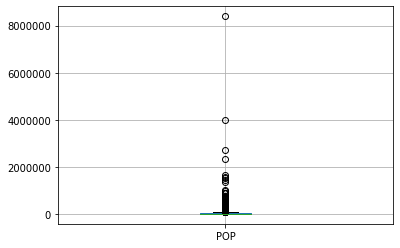

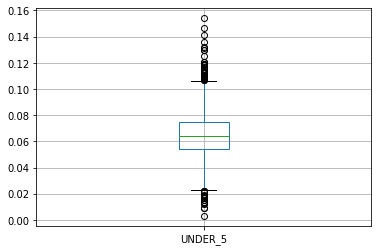

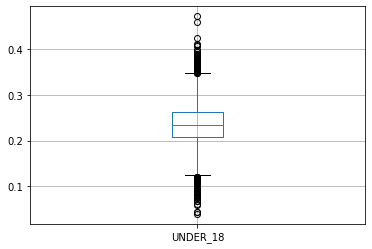

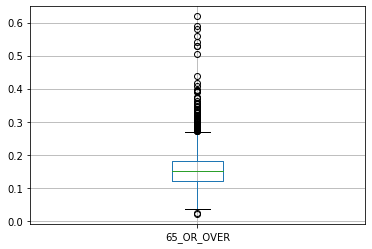

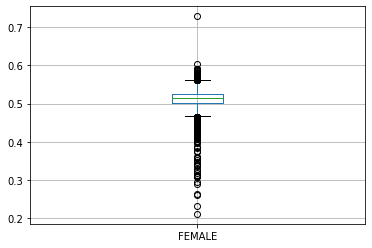

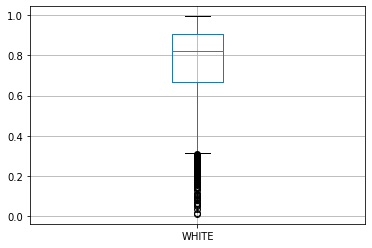

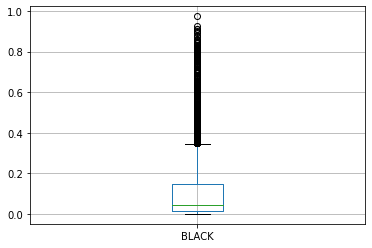

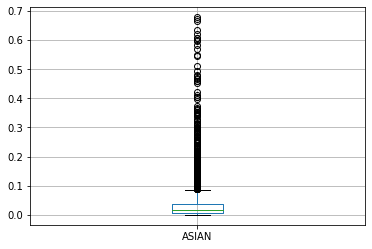

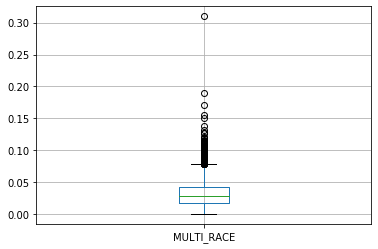

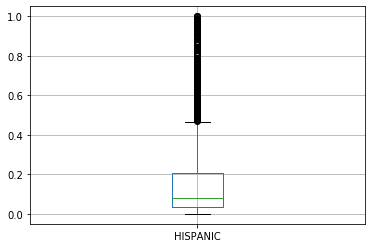

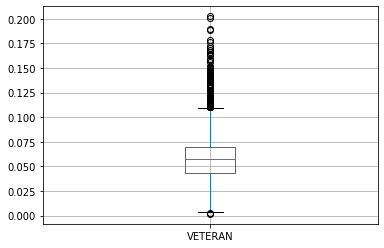

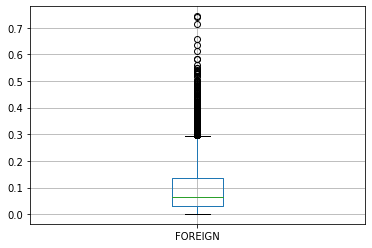

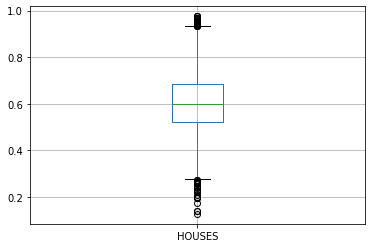

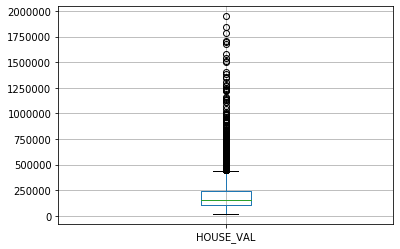

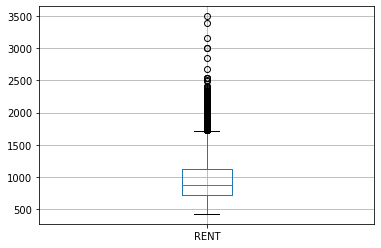

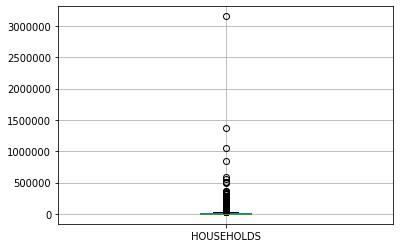

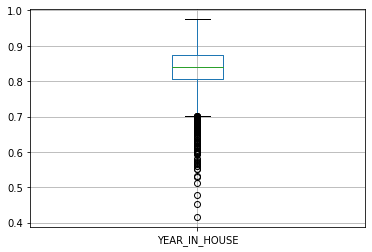

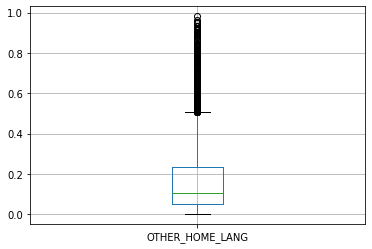

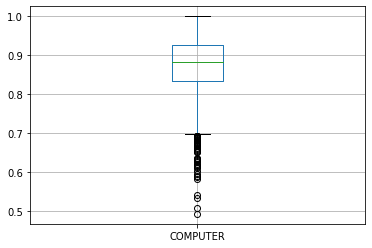

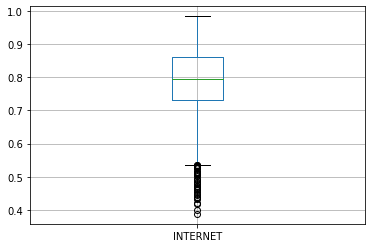

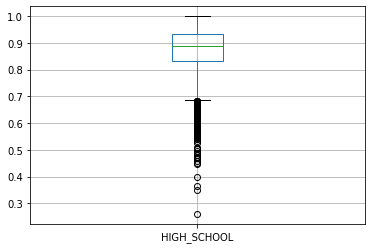

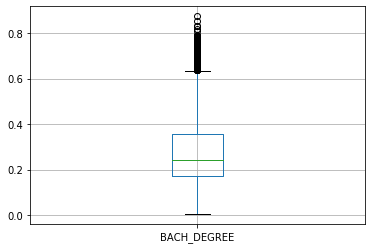

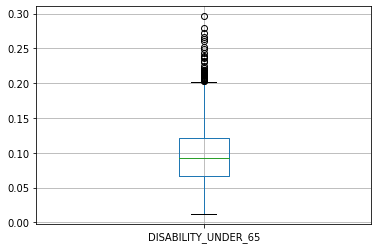

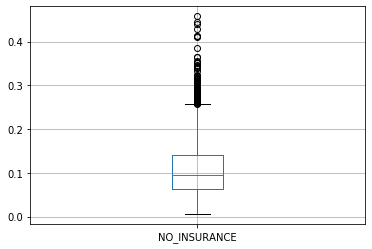

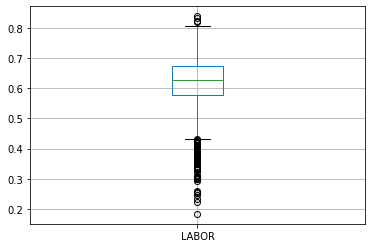

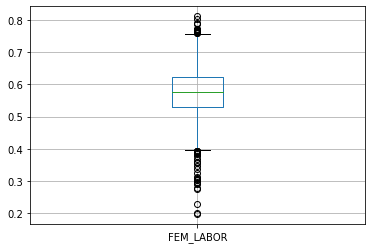

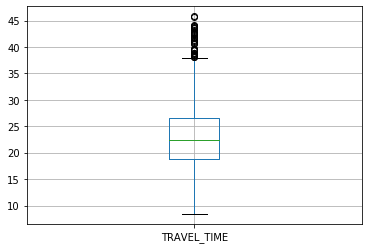

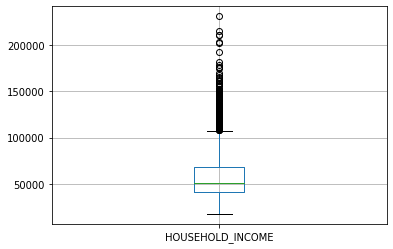

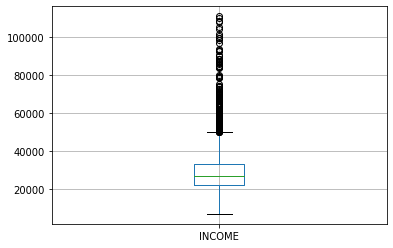

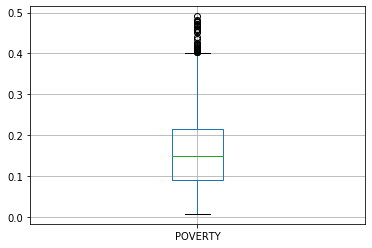

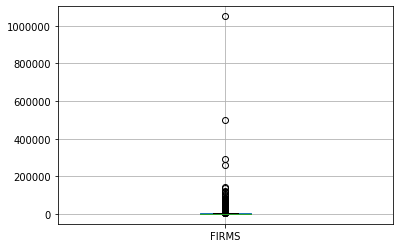

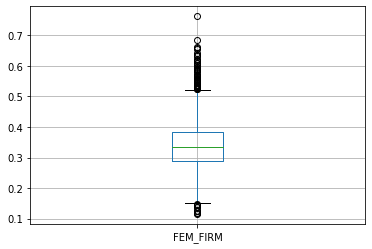

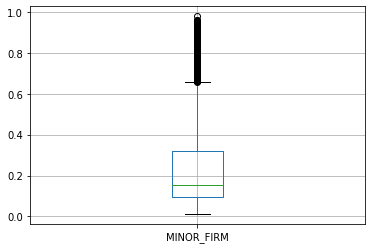

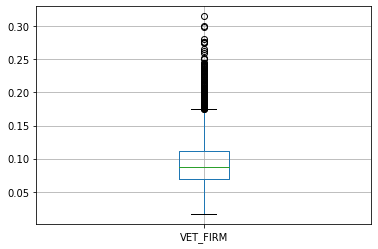

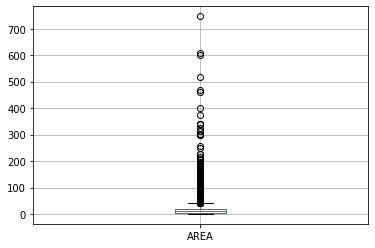

In [29]:
print("With Outliers:")
for column in continuous:
    df.boxplot(column=column)
    plt.show()

In [30]:

def remove_outliers(continous_columns, dataframe):
    """Return a dataframe with any values below the lower fence and above the upper fence removed from given columns in the given dataframe."""
    for column in continous_columns:
        # calculate values for lower fence and upper fence
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR
        # remove rows from dataframe which fall out of this range
        num_removing = dataframe.shape[0]
        new_df = dataframe[dataframe[column] > lower_fence]
        new_df = dataframe[dataframe[column] < upper_fence]
        num_removing -= new_df.shape[0]
        print(f"{num_removing} rows will be removed from {column}.")
    return new_df

In [31]:
remove_outliers(continuous, df)

362 rows will be removed from POP.
48 rows will be removed from UNDER_5.
53 rows will be removed from UNDER_18.
88 rows will be removed from 65_OR_OVER.
61 rows will be removed from FEMALE.
0 rows will be removed from WHITE.
380 rows will be removed from BLACK.
346 rows will be removed from ASIAN.
102 rows will be removed from MULTI_RACE.
308 rows will be removed from HISPANIC.
126 rows will be removed from VETERAN.
256 rows will be removed from FOREIGN.
27 rows will be removed from HOUSES.
290 rows will be removed from HOUSE_VAL.
167 rows will be removed from RENT.
364 rows will be removed from HOUSEHOLDS.
0 rows will be removed from YEAR_IN_HOUSE.
244 rows will be removed from OTHER_HOME_LANG.
0 rows will be removed from COMPUTER.
0 rows will be removed from INTERNET.
0 rows will be removed from HIGH_SCHOOL.
129 rows will be removed from BACH_DEGREE.
48 rows will be removed from DISABILITY_UNDER_65.
90 rows will be removed from NO_INSURANCE.
4 rows will be removed from LABOR.
15 rows

,PA,POP,UNDER_5,UNDER_18,65_OR_OVER,FEMALE,WHITE,BLACK,AMERICAN_INDIAN,ASIAN,PACIFIC_ISLANDER,MULTI_RACE,HISPANIC,VETERAN,FOREIGN,HOUSES,HOUSE_VAL,RENT,HOUSEHOLDS,YEAR_IN_HOUSE,OTHER_HOME_LANG,COMPUTER,INTERNET,HIGH_SCHOOL,BACH_DEGREE,DISABILITY_UNDER_65,NO_INSURANCE,LABOR,FEM_LABOR,TRAVEL_TIME,HOUSEHOLD_INCOME,INCOME,POVERTY,FIRMS,FEM_FIRM,MINOR_FIRM,VET_FIRM,POP_AREA,AREA
8,conservative,50440.0,0.049,0.244,0.107,0.502,0.741,0.150,1,0.055,0,0.038,0.052,0.092942,0.081,0.699,245000.0,887.0,18591.0,0.849,0.105,0.961,0.899,0.964,0.575,0.065,0.057,0.682,0.593,19.6,89522.0,45299.0,0.063,3511.0,0.398462,0.211621,0.100256,1450.9,29.59
9,conservative,40428.0,0.055,0.188,0.181,0.527,0.769,0.195,1,0.009,1,0.018,0.038,0.061937,0.032,0.530,134500.0,643.0,17482.0,0.737,0.052,0.816,0.691,0.863,0.278,0.096,0.137,0.551,0.511,18.6,38902.0,24542.0,0.219,4086.0,0.315467,0.139011,0.101077,1512.4,26.00
11,liberal,36435.0,0.076,0.262,0.116,0.527,0.494,0.437,1,0.007,1,0.039,0.059,0.089255,0.028,0.505,126200.0,825.0,14462.0,0.795,0.049,0.835,0.681,0.842,0.197,0.126,0.147,0.595,0.583,22.9,40218.0,22501.0,0.225,3123.0,0.414025,0.427474,0.115274,1182.6,27.75
12,conservative,35662.0,0.060,0.246,0.144,0.513,0.758,0.189,1,0.017,1,0.024,0.037,0.108603,0.032,0.654,156400.0,1013.0,13776.0,0.816,0.060,0.898,0.849,0.890,0.324,0.127,0.086,0.589,0.550,22.5,59822.0,30693.0,0.150,1962.0,0.360347,0.186544,0.112130,1033.6,32.85
13,liberal,34461.0,0.063,0.268,0.160,0.509,0.898,0.036,1,0.039,1,0.011,0.034,0.041148,0.068,0.778,364000.0,1125.0,13091.0,0.861,0.089,0.931,0.901,0.976,0.689,0.042,0.043,0.666,0.580,20.8,105218.0,57174.0,0.039,4224.0,0.269650,0.074100,0.114110,1753.5,19.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3530,conservative,5080.0,0.069,0.246,0.149,0.518,0.939,0.000,0,0.032,0,0.029,0.017,0.068110,0.029,0.662,148500.0,816.0,2136.0,0.835,0.031,0.876,0.759,0.951,0.315,0.044,0.056,0.724,0.663,24.5,57976.0,30908.0,0.087,439.0,0.145786,0.153257,0.168565,1185.8,4.20
3531,conservative,5896.0,0.040,0.179,0.221,0.519,0.959,0.007,1,0.005,0,0.020,0.029,0.108887,0.012,0.532,105900.0,653.0,2763.0,0.764,0.029,0.819,0.776,0.932,0.194,0.118,0.091,0.626,0.615,16.7,50467.0,28786.0,0.071,825.0,0.215758,0.054545,0.143030,776.1,7.82
3532,conservative,5923.0,0.073,0.250,0.134,0.504,0.911,0.009,1,0.003,0,0.030,0.106,0.064157,0.054,0.589,187700.0,1004.0,2409.0,0.810,0.098,0.900,0.813,0.895,0.369,0.066,0.064,0.709,0.687,24.3,67774.0,29763.0,0.080,505.0,0.370297,0.153257,0.087919,1407.0,4.06
3533,liberal,5613.0,0.044,0.259,0.170,0.498,0.971,0.010,0,0.000,0,0.012,0.022,0.064849,0.014,0.638,141500.0,776.0,2257.0,0.878,0.017,0.858,0.729,0.922,0.224,0.096,0.045,0.668,0.644,22.2,61753.0,29629.0,0.059,437.0,0.425629,0.153257,0.087919,1572.4,3.53


Based on the number of outliers in our continous columns we plan to log transform most of them. Its not surprising that our data is skewed due to the population set of the 5000 largest cities. We would
expect some extremely tailed outliers.

In [32]:
df.shape

(3513, 39)

In [33]:
logs = ['POP','HOUSE_VAL','RENT','HOUSEHOLDS','HOUSEHOLD_INCOME','INCOME','FIRMS','POP_AREA', 'AREA']
for col in logs:
    df[col]=np.log(df[col])

In [34]:
remove_outliers(continuous, df)

51 rows will be removed from POP.
48 rows will be removed from UNDER_5.
53 rows will be removed from UNDER_18.
88 rows will be removed from 65_OR_OVER.
61 rows will be removed from FEMALE.
0 rows will be removed from WHITE.
380 rows will be removed from BLACK.
346 rows will be removed from ASIAN.
102 rows will be removed from MULTI_RACE.
308 rows will be removed from HISPANIC.
126 rows will be removed from VETERAN.
256 rows will be removed from FOREIGN.
27 rows will be removed from HOUSES.
73 rows will be removed from HOUSE_VAL.
43 rows will be removed from RENT.
52 rows will be removed from HOUSEHOLDS.
0 rows will be removed from YEAR_IN_HOUSE.
244 rows will be removed from OTHER_HOME_LANG.
0 rows will be removed from COMPUTER.
0 rows will be removed from INTERNET.
0 rows will be removed from HIGH_SCHOOL.
129 rows will be removed from BACH_DEGREE.
48 rows will be removed from DISABILITY_UNDER_65.
90 rows will be removed from NO_INSURANCE.
4 rows will be removed from LABOR.
15 rows wil

,PA,POP,UNDER_5,UNDER_18,65_OR_OVER,FEMALE,WHITE,BLACK,AMERICAN_INDIAN,ASIAN,PACIFIC_ISLANDER,MULTI_RACE,HISPANIC,VETERAN,FOREIGN,HOUSES,HOUSE_VAL,RENT,HOUSEHOLDS,YEAR_IN_HOUSE,OTHER_HOME_LANG,COMPUTER,INTERNET,HIGH_SCHOOL,BACH_DEGREE,DISABILITY_UNDER_65,NO_INSURANCE,LABOR,FEM_LABOR,TRAVEL_TIME,HOUSEHOLD_INCOME,INCOME,POVERTY,FIRMS,FEM_FIRM,MINOR_FIRM,VET_FIRM,POP_AREA,AREA
2,liberal,12.152524,0.063,0.217,0.160,0.526,0.448,0.506,1,0.018,0,0.017,0.026,0.064841,0.034,0.539,11.709314,6.728629,11.260199,0.848,0.047,0.816,0.700,0.885,0.285,0.099,0.136,0.565,0.547,22.4,10.611228,10.166736,0.220,9.909370,0.429665,0.437817,0.113083,7.246083,4.935265
4,liberal,11.351676,0.069,0.254,0.156,0.528,0.727,0.174,1,0.049,0,0.020,0.062,0.054143,0.095,0.691,12.543972,7.003065,10.394672,0.823,0.128,0.957,0.912,0.963,0.575,0.054,0.065,0.693,0.616,23.9,11.339072,10.691922,0.067,8.984944,0.309572,0.171761,0.104109,7.456223,3.853546
5,conservative,11.130889,0.065,0.236,0.172,0.528,0.622,0.340,1,0.011,0,0.019,0.034,0.077967,0.026,0.595,11.896826,6.599870,10.165890,0.855,0.040,0.830,0.743,0.874,0.250,0.122,0.120,0.580,0.526,19.2,10.729438,10.227309,0.191,8.797851,0.385498,0.257855,0.118580,6.596600,4.493121
6,liberal,11.523994,0.059,0.188,0.117,0.524,0.511,0.441,1,0.024,1,0.011,0.031,0.048550,0.045,0.473,12.066236,6.736967,10.468574,0.760,0.066,0.844,0.759,0.895,0.366,0.078,0.085,0.564,0.535,19.3,10.694668,10.141086,0.242,8.824972,0.371949,0.287121,0.098500,7.314486,4.098171
7,liberal,11.093432,0.051,0.183,0.075,0.506,0.729,0.170,1,0.085,0,0.011,0.043,0.033177,0.104,0.441,12.433208,6.766192,10.036706,0.697,0.129,0.953,0.860,0.944,0.567,0.058,0.055,0.583,0.552,19.6,10.706699,10.228863,0.291,8.446556,0.285898,0.200472,0.077055,6.823613,4.061649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3530,conservative,8.533067,0.069,0.246,0.149,0.518,0.939,0.000,0,0.032,0,0.029,0.017,0.068110,0.029,0.662,11.908340,6.704414,7.666690,0.835,0.031,0.876,0.759,0.951,0.315,0.044,0.056,0.724,0.663,24.5,10.967784,10.338770,0.087,6.084499,0.145786,0.153257,0.168565,7.078173,1.435085
3531,conservative,8.682029,0.040,0.179,0.221,0.519,0.959,0.007,1,0.005,0,0.020,0.029,0.108887,0.012,0.532,11.570251,6.481577,7.924072,0.764,0.029,0.819,0.776,0.932,0.194,0.118,0.091,0.626,0.615,16.7,10.829075,10.267644,0.071,6.715383,0.215758,0.054545,0.143030,6.654281,2.056685
3532,conservative,8.686598,0.073,0.250,0.134,0.504,0.911,0.009,1,0.003,0,0.030,0.106,0.064157,0.054,0.589,12.142600,6.911747,7.786967,0.810,0.098,0.900,0.813,0.895,0.369,0.066,0.064,0.709,0.687,24.3,11.123934,10.301021,0.080,6.224558,0.370297,0.153257,0.087919,7.249215,1.401183
3533,liberal,8.632841,0.044,0.259,0.170,0.498,0.971,0.010,0,0.000,0,0.012,0.022,0.064849,0.014,0.638,11.860055,6.654153,7.721792,0.878,0.017,0.858,0.729,0.922,0.224,0.096,0.045,0.668,0.644,22.2,11.030898,10.296509,0.059,6.079933,0.425629,0.153257,0.087919,7.360358,1.261298


Now we'll check for multi-collinearity

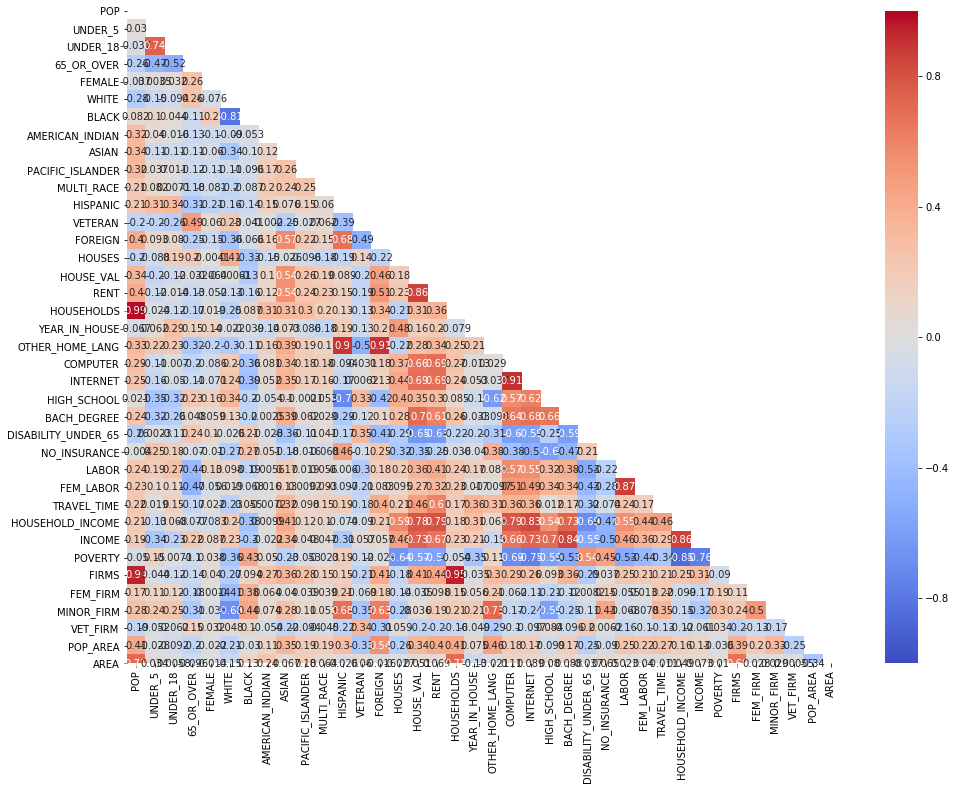

In [35]:
f, ax = plt.subplots(figsize=(16, 12))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

We can see some very large collinearitys so the final step before some initial EDA is going to be to drop the following since they have a correlation of .85 or higher with a column we'll be keeping: number of households, number of firms, foreign language spoken at home, rent, household income, access to the internet

In [36]:
df.drop(columns = ['HOUSEHOLDS','FIRMS','OTHER_HOME_LANG','RENT','INTERNET','HOUSEHOLD_INCOME'],inplace=True)

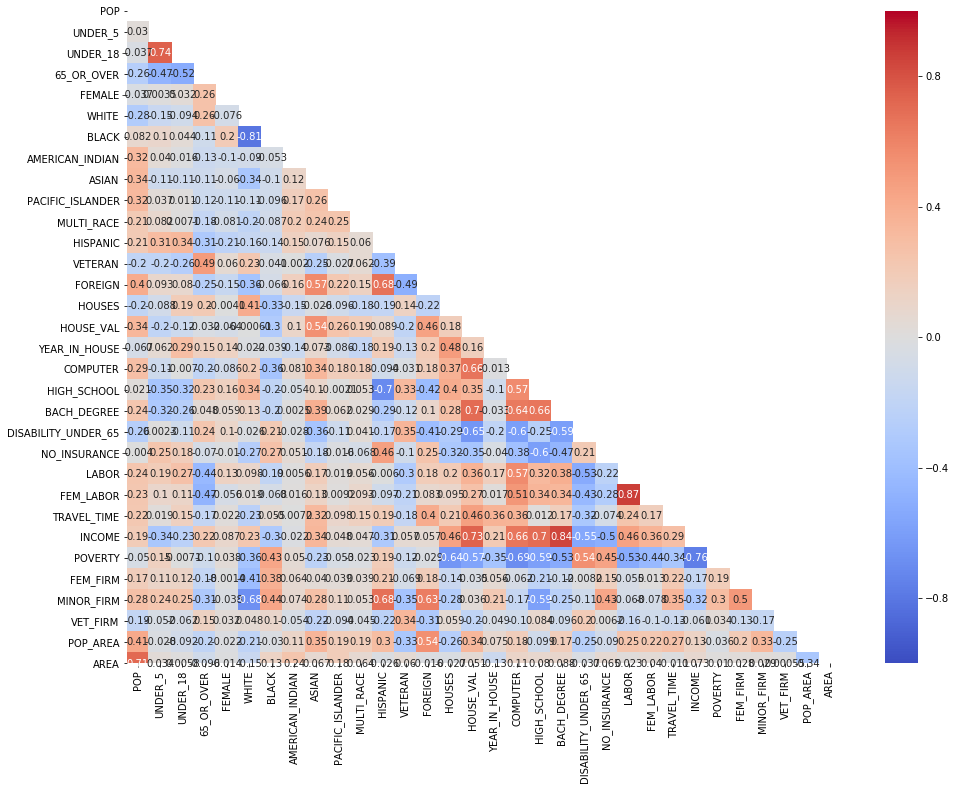

In [37]:
f, ax = plt.subplots(figsize=(16, 12))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

# EDA

Target Variable
PA
conservative    1613
liberal         1900
Name: PA, dtype: int64


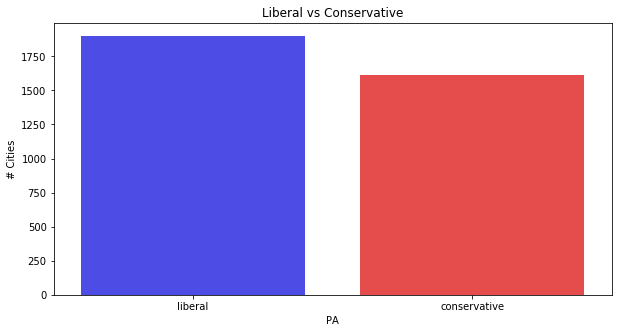

In [38]:

# Politics Count
print('Target Variable')
print(df.groupby(['PA']).PA.count())

# Target Variable Countplot
plt.figure(figsize = (10,5))
sns.countplot(df['PA'], alpha =.80, palette= ['blue','red'])
plt.title('Liberal vs Conservative')
plt.ylabel('# Cities')
plt.show()

In [39]:

# Identify non-percentage continuous features
print('Non-Percentage Features')
non_percentage = ['POP','HOUSE_VAL', 'TRAVEL_TIME', 'INCOME','AREA']
print(df[non_percentage].describe().transpose())



Non-Percentage Features
              count       mean       std       min        25%        50%  \
POP          3513.0   9.963350  1.034714  8.520787   9.131189   9.762270   
HOUSE_VAL    3513.0  12.052590  0.619620  9.781320  11.611865  11.962088   
TRAVEL_TIME  3513.0  22.964133  5.810909  8.400000  18.800000  22.400000   
INCOME       3513.0  10.225458  0.349366  8.826588   9.995474  10.188629   
AREA         3513.0   2.396790  0.978449 -0.994252   1.726332   2.303585   

                   75%        max  
POP          10.594332  15.943593  
HOUSE_VAL    12.401639  14.482262  
TRAVEL_TIME  26.500000  45.800000  
INCOME       10.408315  11.615554  
AREA          3.015535   6.616065  


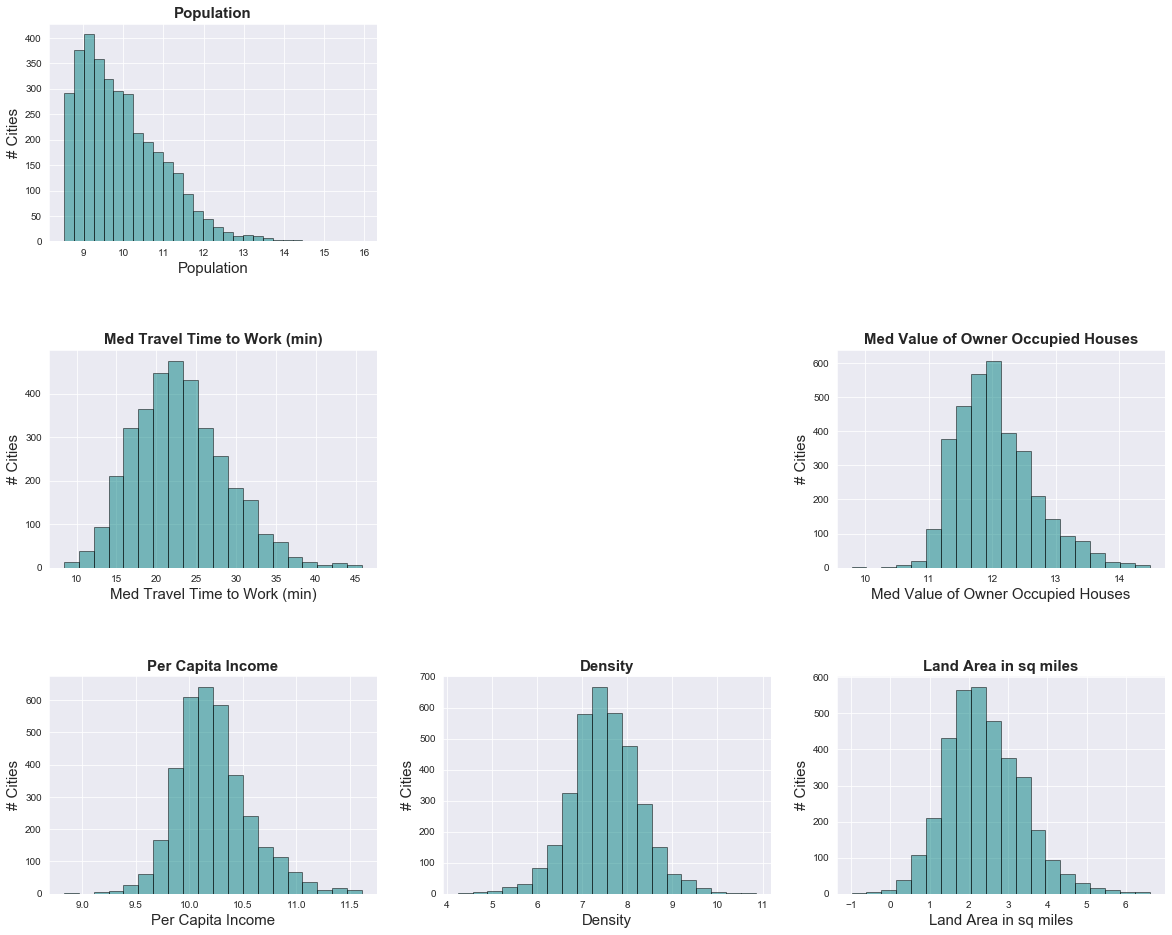

In [40]:
# Subplots of Non-Percentage Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .50)

ax1 = fig.add_subplot(331)
ax1.hist(df['POP'], bins = 30, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Population', fontsize = 15)
ax1.set_ylabel('# Cities',fontsize = 15)
ax1.set_title('Population',fontsize = 15,fontweight='bold')

#ax2 = fig.add_subplot(332)
#ax2.hist(df['RENT'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
#ax2.set_xlabel('Med Rent',fontsize = 15)
#ax2.set_ylabel('# Cities',fontsize = 15)
#ax2.set_title('Med Rent',fontsize = 15,fontweight='bold')

#ax3 = fig.add_subplot(333)
#ax3.hist(df['HOUSEHOLDS'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
#ax3.set_xlabel('# Households',fontsize = 15)
#ax3.set_ylabel('# Cities',fontsize = 15)
#ax3.set_title('# Households',fontsize = 15,fontweight='bold')

ax4 = fig.add_subplot(334)
ax4.hist(df['TRAVEL_TIME'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Med Travel Time to Work (min)', fontsize = 15)
ax4.set_ylabel('# Cities',fontsize = 15)
ax4.set_title('Med Travel Time to Work (min)',fontsize = 15,fontweight='bold')

#ax5 = fig.add_subplot(335)
#ax5.hist(df['HOUSEHOLD_INCOME'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
#ax5.set_xlabel('Med Household Income', fontsize = 15)
#ax5.set_ylabel('# Cities',fontsize = 15)
#ax5.set_title('Med Household Income',fontsize = 15,fontweight='bold')

ax6 = fig.add_subplot(336)
ax6.hist(df['HOUSE_VAL'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax6.set_xlabel('Med Value of Owner Occupied Houses',fontsize = 15)
ax6.set_ylabel('# Cities',fontsize = 15)
ax6.set_title('Med Value of Owner Occupied Houses',fontsize = 15,fontweight='bold')

ax7 = fig.add_subplot(337)
ax7.hist(df['INCOME'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax7.set_xlabel('Per Capita Income',fontsize = 15)
ax7.set_ylabel('# Cities',fontsize = 15)
ax7.set_title('Per Capita Income',fontsize = 15,fontweight='bold')

ax8 = fig.add_subplot(338)
ax8.hist(df['POP_AREA'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax8.set_xlabel('Density', fontsize = 15)
ax8.set_ylabel('# Cities',fontsize = 15)
ax8.set_title('Density',fontsize = 15,fontweight='bold')

ax9 = fig.add_subplot(339)
ax9.hist(df['AREA'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax9.set_xlabel('Land Area in sq miles', fontsize = 15)
ax9.set_ylabel('# Cities',fontsize = 15)
ax9.set_title('Land Area in sq miles',fontsize = 15,fontweight='bold')

plt.show()

In [41]:

# Identify non-percentage continuous features
print('Percentage Features')
percentage = ['UNDER_5', 'UNDER_18', '65_OR_OVER','FEMALE', 'WHITE', 'BLACK','ASIAN',
       'MULTI_RACE', 'HISPANIC', 'VETERAN', 'FOREIGN', 'HOUSES','YEAR_IN_HOUSE',
       'COMPUTER', 'HIGH_SCHOOL', 'BACH_DEGREE','DISABILITY_UNDER_65','NO_INSURANCE',
        'LABOR', 'FEM_LABOR','POVERTY','FEM_FIRM', 'MINOR_FIRM','VET_FIRM']
print(df[percentage].describe().transpose())


Percentage Features
                      count      mean       std       min       25%       50%  \
UNDER_5              3513.0  0.064632  0.016742  0.003000  0.054000  0.064000   
UNDER_18             3513.0  0.235261  0.048426  0.039000  0.207000  0.235000   
65_OR_OVER           3513.0  0.154726  0.052411  0.021000  0.121000  0.152000   
FEMALE               3513.0  0.512127  0.028855  0.211000  0.502000  0.514000   
WHITE                3513.0  0.760486  0.189833  0.011000  0.667000  0.820000   
BLACK                3513.0  0.119381  0.168807  0.000000  0.015000  0.046000   
ASIAN                3513.0  0.037492  0.066367  0.000000  0.007000  0.017000   
MULTI_RACE           3513.0  0.032577  0.020839  0.000000  0.018000  0.029000   
HISPANIC             3513.0  0.164046  0.200898  0.000000  0.035000  0.079000   
VETERAN              3513.0  0.058829  0.024284  0.001666  0.043498  0.057138   
FOREIGN              3513.0  0.103150  0.105700  0.001000  0.030000  0.065000   
HOUSES  

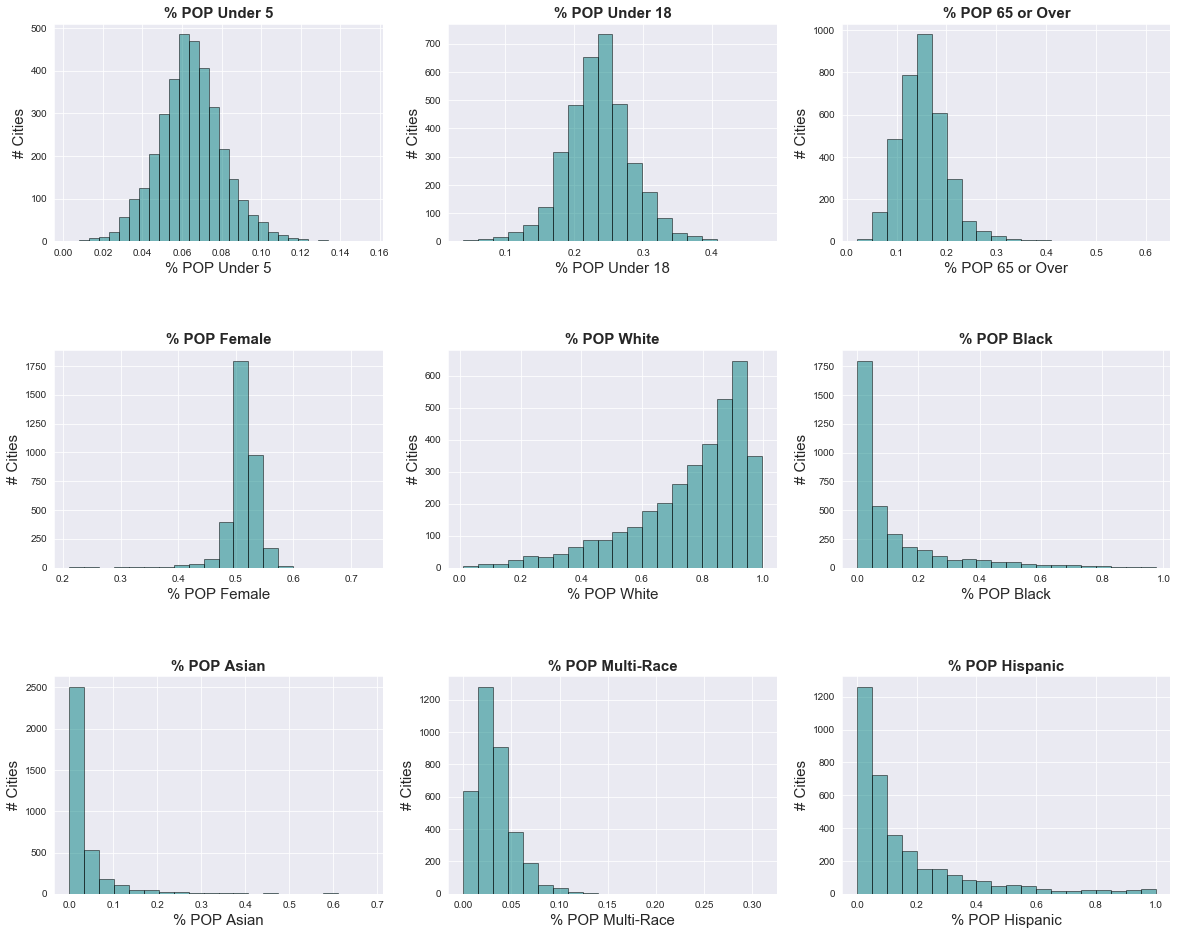

In [42]:
# Subplots of Percentage Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .50)

ax1 = fig.add_subplot(331)
ax1.hist(df['UNDER_5'], bins = 30, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('% POP Under 5', fontsize = 15)
ax1.set_ylabel('# Cities',fontsize = 15)
ax1.set_title('% POP Under 5',fontsize = 15,fontweight='bold')

ax2 = fig.add_subplot(332)
ax2.hist(df['UNDER_18'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('% POP Under 18',fontsize = 15)
ax2.set_ylabel('# Cities',fontsize = 15)
ax2.set_title('% POP Under 18',fontsize = 15,fontweight='bold')

ax3 = fig.add_subplot(333)
ax3.hist(df['65_OR_OVER'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('% POP 65 or Over',fontsize = 15)
ax3.set_ylabel('# Cities',fontsize = 15)
ax3.set_title('% POP 65 or Over',fontsize = 15,fontweight='bold')

ax4 = fig.add_subplot(334)
ax4.hist(df['FEMALE'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('% POP Female', fontsize = 15)
ax4.set_ylabel('# Cities',fontsize = 15)
ax4.set_title('% POP Female',fontsize = 15,fontweight='bold')

ax5 = fig.add_subplot(335)
ax5.hist(df['WHITE'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('% POP White', fontsize = 15)
ax5.set_ylabel('# Cities',fontsize = 15)
ax5.set_title('% POP White',fontsize = 15,fontweight='bold')

ax6 = fig.add_subplot(336)
ax6.hist(df['BLACK'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax6.set_xlabel('% POP Black',fontsize = 15)
ax6.set_ylabel('# Cities',fontsize = 15)
ax6.set_title('% POP Black',fontsize = 15,fontweight='bold')

ax7 = fig.add_subplot(337)
ax7.hist(df['ASIAN'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax7.set_xlabel('% POP Asian',fontsize = 15)
ax7.set_ylabel('# Cities',fontsize = 15)
ax7.set_title('% POP Asian',fontsize = 15,fontweight='bold')

ax8 = fig.add_subplot(338)
ax8.hist(df['MULTI_RACE'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax8.set_xlabel('% POP Multi-Race', fontsize = 15)
ax8.set_ylabel('# Cities',fontsize = 15)
ax8.set_title('% POP Multi-Race',fontsize = 15,fontweight='bold')

ax9 = fig.add_subplot(339)
ax9.hist(df['HISPANIC'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax9.set_xlabel('% POP Hispanic', fontsize = 15)
ax9.set_ylabel('# Cities',fontsize = 15)
ax9.set_title('% POP Hispanic',fontsize = 15,fontweight='bold')

plt.show()

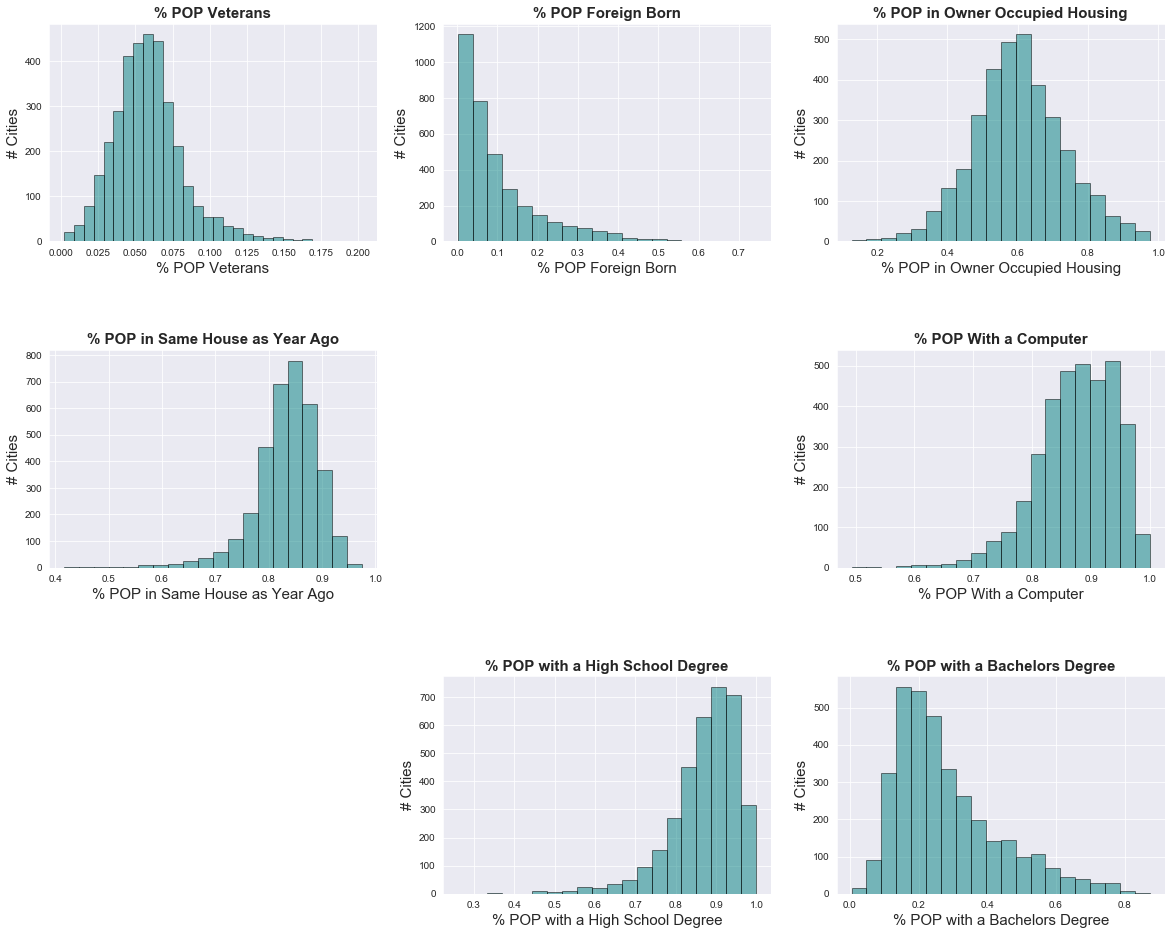

In [43]:
# Subplots of Percentage Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .50)

ax1 = fig.add_subplot(331)
ax1.hist(df['VETERAN'], bins = 30, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('% POP Veterans', fontsize = 15)
ax1.set_ylabel('# Cities',fontsize = 15)
ax1.set_title('% POP Veterans',fontsize = 15,fontweight='bold')

ax2 = fig.add_subplot(332)
ax2.hist(df['FOREIGN'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('% POP Foreign Born',fontsize = 15)
ax2.set_ylabel('# Cities',fontsize = 15)
ax2.set_title('% POP Foreign Born',fontsize = 15,fontweight='bold')

ax3 = fig.add_subplot(333)
ax3.hist(df['HOUSES'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('% POP in Owner Occupied Housing',fontsize = 15)
ax3.set_ylabel('# Cities',fontsize = 15)
ax3.set_title('% POP in Owner Occupied Housing',fontsize = 15,fontweight='bold')

ax4 = fig.add_subplot(334)
ax4.hist(df['YEAR_IN_HOUSE'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('% POP in Same House as Year Ago', fontsize = 15)
ax4.set_ylabel('# Cities',fontsize = 15)
ax4.set_title('% POP in Same House as Year Ago',fontsize = 15,fontweight='bold')

#ax5 = fig.add_subplot(335)
#ax5.hist(df['OTHER_HOME_LANG'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
#ax5.set_xlabel('% POP Speaks Foreign Language at Home', fontsize = 15)
#ax5.set_ylabel('# Cities',fontsize = 15)
#ax5.set_title('% POP Speaks Foreign Language at Home',fontsize = 15,fontweight='bold')

ax6 = fig.add_subplot(336)
ax6.hist(df['COMPUTER'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax6.set_xlabel('% POP With a Computer',fontsize = 15)
ax6.set_ylabel('# Cities',fontsize = 15)
ax6.set_title('% POP With a Computer',fontsize = 15,fontweight='bold')

#ax7 = fig.add_subplot(337)
#ax7.hist(df['INTERNET'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
#ax7.set_xlabel('% POP With Internet',fontsize = 15)
#ax7.set_ylabel('# Cities',fontsize = 15)
#ax7.set_title('% POP With Internet',fontsize = 15,fontweight='bold')

ax8 = fig.add_subplot(338)
ax8.hist(df['HIGH_SCHOOL'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax8.set_xlabel('% POP with a High School Degree', fontsize = 15)
ax8.set_ylabel('# Cities',fontsize = 15)
ax8.set_title('% POP with a High School Degree',fontsize = 15,fontweight='bold')

ax9 = fig.add_subplot(339)
ax9.hist(df['BACH_DEGREE'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax9.set_xlabel('% POP with a Bachelors Degree', fontsize = 15)
ax9.set_ylabel('# Cities',fontsize = 15)
ax9.set_title('% POP with a Bachelors Degree',fontsize = 15,fontweight='bold')

plt.show()

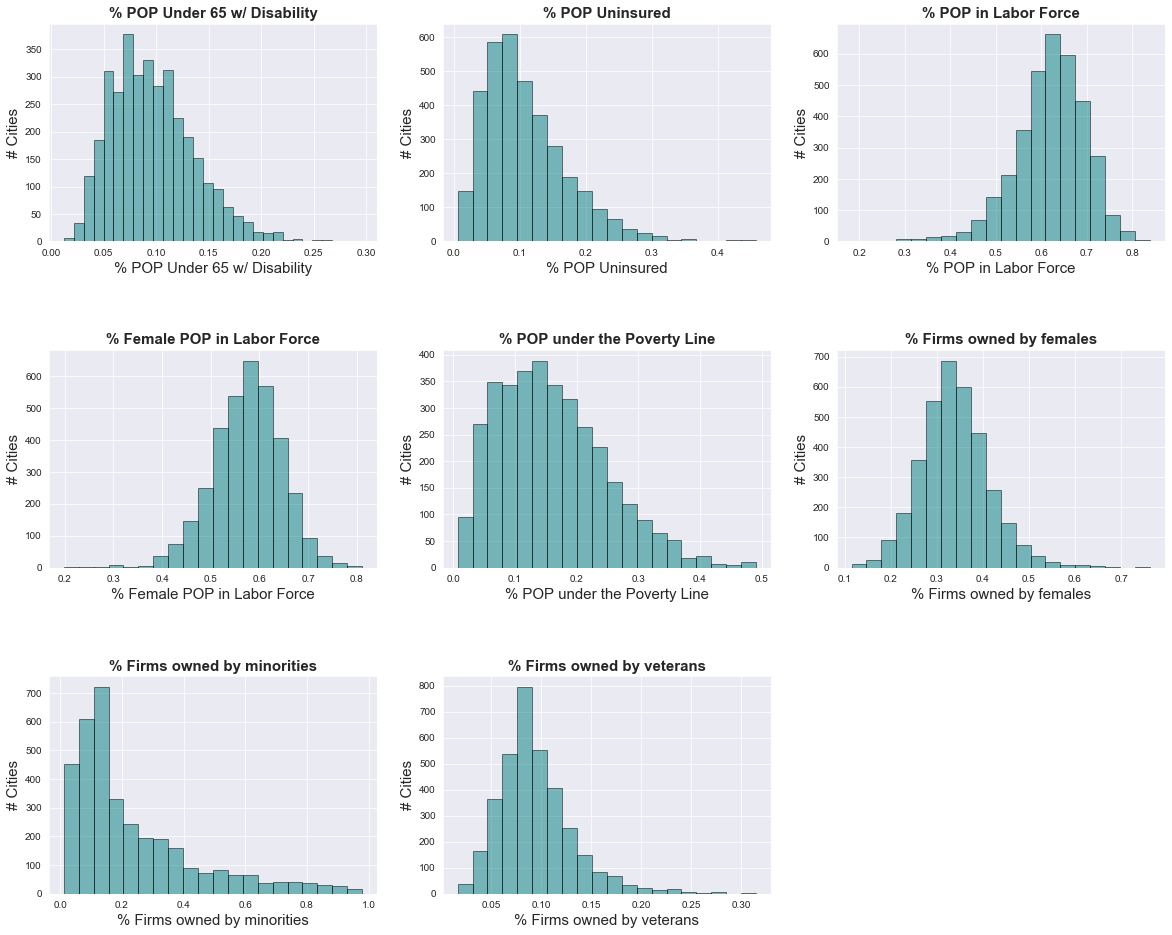

In [44]:
# Subplots of Non-Percentage Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .50)

ax1 = fig.add_subplot(331)
ax1.hist(df['DISABILITY_UNDER_65'], bins = 30, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('% POP Under 65 w/ Disability', fontsize = 15)
ax1.set_ylabel('# Cities',fontsize = 15)
ax1.set_title('% POP Under 65 w/ Disability',fontsize = 15,fontweight='bold')

ax2 = fig.add_subplot(332)
ax2.hist(df['NO_INSURANCE'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('% POP Uninsured',fontsize = 15)
ax2.set_ylabel('# Cities',fontsize = 15)
ax2.set_title('% POP Uninsured',fontsize = 15,fontweight='bold')

ax3 = fig.add_subplot(333)
ax3.hist(df['LABOR'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('% POP in Labor Force',fontsize = 15)
ax3.set_ylabel('# Cities',fontsize = 15)
ax3.set_title('% POP in Labor Force',fontsize = 15,fontweight='bold')

ax4 = fig.add_subplot(334)
ax4.hist(df['FEM_LABOR'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('% Female POP in Labor Force', fontsize = 15)
ax4.set_ylabel('# Cities',fontsize = 15)
ax4.set_title('% Female POP in Labor Force',fontsize = 15,fontweight='bold')

ax5 = fig.add_subplot(335)
ax5.hist(df['POVERTY'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('% POP under the Poverty Line', fontsize = 15)
ax5.set_ylabel('# Cities',fontsize = 15)
ax5.set_title('% POP under the Poverty Line',fontsize = 15,fontweight='bold')

ax6 = fig.add_subplot(336)
ax6.hist(df['FEM_FIRM'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax6.set_xlabel('% Firms owned by females',fontsize = 15)
ax6.set_ylabel('# Cities',fontsize = 15)
ax6.set_title('% Firms owned by females',fontsize = 15,fontweight='bold')

ax7 = fig.add_subplot(337)
ax7.hist(df['MINOR_FIRM'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax7.set_xlabel('% Firms owned by minorities',fontsize = 15)
ax7.set_ylabel('# Cities',fontsize = 15)
ax7.set_title('% Firms owned by minorities',fontsize = 15,fontweight='bold')

ax8 = fig.add_subplot(338)
ax8.hist(df['VET_FIRM'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax8.set_xlabel('% Firms owned by veterans', fontsize = 15)
ax8.set_ylabel('# Cities',fontsize = 15)
ax8.set_title('% Firms owned by veterans',fontsize = 15,fontweight='bold')



plt.show()

Now we'll make a few new categorical columns based on some of our percentages. These include if the city is:

Majority Female

Majority White

In [45]:
df['MAJ_FEMALE']=df['FEMALE'].apply(lambda x: 1 if x>.5 else 0)
df['MAJ_WHITE']=df['WHITE'].apply(lambda x: 1 if x>.5 else 0)

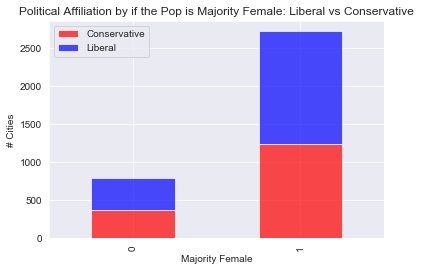

In [46]:

chart = df.groupby(['MAJ_FEMALE','PA']).MAJ_FEMALE.count().unstack()
p = chart.plot(kind = 'bar', stacked = True, 
                   title = 'Political Affiliation by if the Pop is Majority Female: Liberal vs Conservative', 
                   color = ['red','blue'], alpha = .70)
p.set_xlabel('Majority Female')
p.set_ylabel('# Cities')
p.legend(['Conservative','Liberal'])
plt.show()

In [47]:
values = df.groupby(['MAJ_FEMALE','PA']).PA.count()
values

MAJ_FEMALE  PA          
0           conservative     373
            liberal          415
1           conservative    1240
            liberal         1485
Name: PA, dtype: int64

In [48]:
#size of each sample
lengths = df.groupby('MAJ_FEMALE')['PA'].count()
#we'll set our proportions equal to proportion conservative
pro_1 = values[0][0]/lengths[0]
pro_2 = values[1][0]/lengths[1]
pro_overall = (values[0][0]+values[1][0])/(lengths[0]+lengths[1])
print(pro_1)
print(pro_2)
print(pro_overall)

0.4733502538071066
0.45504587155963305
0.4591517221747794


Our null hypothesis is that the proportions are the same, the alternative is that they are different with a p-value of 0.05

In [49]:
z_score_fem = (pro_1 - pro_2)/np.sqrt((pro_overall*(1-pro_overall))*(1/lengths[0]+1/lengths[1]))

z_score_fem

0.9081268770062985

In [50]:
stats.norm.cdf(z_score_fem)


0.8180944040694835

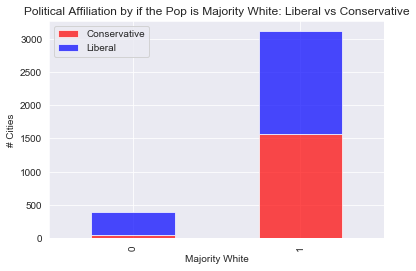

In [51]:

chart = df.groupby(['MAJ_WHITE','PA']).MAJ_FEMALE.count().unstack()
p = chart.plot(kind = 'bar', stacked = True, 
                   title = 'Political Affiliation by if the Pop is Majority White: Liberal vs Conservative', 
                   color = ['red','blue'], alpha = .70)
p.set_xlabel('Majority White')
p.set_ylabel('# Cities')
p.legend(['Conservative','Liberal'])
plt.show()

In [52]:
values = df.groupby(['MAJ_WHITE','PA']).PA.count()
values

MAJ_WHITE  PA          
0          conservative      43
           liberal          356
1          conservative    1570
           liberal         1544
Name: PA, dtype: int64

Our null hypothesis is that the proportions are the same, the alternative is that they are different with a p-value of 0.05

In [53]:
#size of each sample
lengths = df.groupby('MAJ_WHITE')['PA'].count()
#we'll set our proportions equal to proportion conservative
pro_1 = values[0][0]/lengths[0]
pro_2 = values[1][0]/lengths[1]
pro_overall = (values[0][0]+values[1][0])/(lengths[0]+lengths[1])
print(pro_1)
print(pro_2)
print(pro_overall)

0.10776942355889724
0.50417469492614
0.4591517221747794


In [54]:
z_score_white = (pro_1 - pro_2)/np.sqrt((pro_overall*(1-pro_overall))*(1/lengths[0]+1/lengths[1]))

z_score_white

-14.95995419367076

In [55]:
stats.norm.cdf(z_score_white)

6.705916101288575e-51

This variable seems like an extremely important indicator! Based on this we will drop majority female as a feature but keep majority white.

In [56]:
df.drop(columns = 'MAJ_FEMALE',inplace=True)

In [57]:

df['UNDR_5_BLK'] = df['BLACK'].apply(lambda x: 1 if x<.05 else 0)
df['UNDR_5_AZN'] = df['ASIAN'].apply(lambda x: 1 if x<.05 else 0)
df['UNDR_5_HISP'] = df['HISPANIC'].apply(lambda x: 1 if x<.05 else 0)

In [58]:
print(df['UNDR_5_BLK'].sum())
print(df['UNDR_5_AZN'].sum())
print(df['UNDR_5_HISP'].sum())

1813
2836
1261


In [59]:
df['SUPER_WHITE'] = df['MAJ_WHITE']*df['UNDR_5_HISP']*df['UNDR_5_AZN']*df['UNDR_5_BLK']

In [60]:
print(df['SUPER_WHITE'].sum())

637


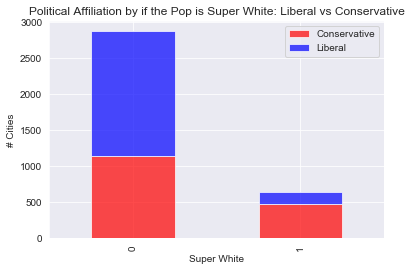

In [61]:

chart = df.groupby(['SUPER_WHITE','PA']).SUPER_WHITE.count().unstack()
p = chart.plot(kind = 'bar', stacked = True, 
                   title = 'Political Affiliation by if the Pop is Super White: Liberal vs Conservative', 
                   color = ['red','blue'], alpha = .70)
p.set_xlabel('Super White')
p.set_ylabel('# Cities')
p.legend(['Conservative','Liberal'])
plt.show()

In [62]:
values = df.groupby(['SUPER_WHITE','PA']).PA.count()
values

SUPER_WHITE  PA          
0            conservative    1137
             liberal         1739
1            conservative     476
             liberal          161
Name: PA, dtype: int64

In [63]:
#size of each sample
lengths = df.groupby('SUPER_WHITE')['PA'].count()
#we'll set our proportions equal to proportion conservative
pro_1 = values[0][0]/lengths[0]
pro_2 = values[1][0]/lengths[1]
pro_overall = (values[0][0]+values[1][0])/(lengths[0]+lengths[1])
print(pro_1)
print(pro_2)
print(pro_overall)

0.39534075104311545
0.7472527472527473
0.4591517221747794


In [64]:
z_score_superwhite = (pro_1 - pro_2)/np.sqrt((pro_overall*(1-pro_overall))*(1/lengths[0]+1/lengths[1]))

z_score_superwhite

-16.126618766922018

In [65]:
stats.norm.cdf(z_score_superwhite)

8.292781271930726e-59

This variable seems like an extremely important indicator! Based on this we will keep super majority white as an indicator

In [66]:
df['PA']=df['PA'].apply(lambda x: 0 if x == 'conservative' else 1)

In [67]:
X = df.drop(columns = 'PA')
y = df['PA']

In [72]:
def classification_models(X,y,models,test_size = .2,random_state = 13,params=None,grid=False,param_grid=None,cv=5):
    '''Takes features,target,model type, gridsearch yes or no,parameters and outputs the results'''
    scaler = MinMaxScaler()
    scaler.fit(X)
    model_dict = {'logistic': LogisticRegression,'knn': KNeighborsClassifier,
                 'tree': DecisionTreeClassifier,'rf': RandomForestClassifier,
                 'xgb': xgb.XGBClassifier, 'AdaBoost': AdaBoostClassifier,
                 'GrdBoost': GradientBoostingClassifier, 'svc': SVC,
                 'Bayes': GaussianNB}
    
   
    X_transformed = scaler.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y,test_size = test_size, 
                                                        random_state=random_state)
    summary_df = pd.DataFrame(columns=['Model','Accuracy', 'Recall', 'Precision',  'F1'])
    i = 0
    if (params==None) & (grid == False):
        for model in models:
            for key, value in model_dict.items(): 
                if model == key: 
                    model_use = value()
                    model_use.fit(X_train,y_train)
                    predictions = model_use.predict(X_test)
                    summary_df = summary_df.append({'Model': model,
                       'Accuracy': metrics.accuracy_score(y_test, predictions),
                       'Recall': metrics.recall_score(y_test, predictions),
                       'Precision': metrics.precision_score(y_test, predictions), 
                       'F1': metrics.f1_score(y_test, predictions)},ignore_index=True)
                    print('base')
    elif grid == True:
        for model in models:
            for key, value in model_dict.items(): 
                if model == key: 
                    model_use = GridSearchCV(estimator = value(),param_grid = param_grid[i],cv = cv)
                    model_use.fit(X_train,y_train)
                    model_grid = value(**model_use.best_params_)
                    model_grid.fit(X_train,y_train)
                    y_pred = model_grid.predict(X_test)
                    i = i+1
                    summary_df = summary_df.append({'Model':model,
                   'Accuracy': metrics.accuracy_score(y_test, y_pred),
                   'Recall': metrics.recall_score(y_test, y_pred),
                   'Precision': metrics.precision_score(y_test, y_pred), 
                   'F1': metrics.f1_score(y_test, y_pred)},ignore_index=True)
                    print(model_use.best_params_)
    else:
        for model in models:
            for key, value in model_dict.items(): 
                if model == key: 
                    model_use = value(**params[i])
                    model_use.fit(X_train,y_train)
                    y_pred = model_use.predict(X_test)
                    i = i+1
                    summary_df = summary_df.append({'Model':model,
                   'Accuracy': metrics.accuracy_score(y_test, y_pred),
                   'Recall': metrics.recall_score(y_test, y_pred),
                   'Precision': metrics.precision_score(y_test, y_pred), 
                   'F1': metrics.f1_score(y_test, y_pred)},ignore_index=True)
                    print("params")
    return summary_df
    

In [78]:
#models = ['logistic','knn','tree','rf','AdaBoost','xgb','GrdBoost','svc','Bayes']
models = ['logistic','knn','tree','rf','AdaBoost','xgb','GrdBoost','svc','Bayes']
models_grid = ['logistic','knn','tree','rf','AdaBoost','GrdBoost','svc']
params = [{'penalty' : 'l1'},{'n_neighbors' : 5,'weights':'uniform'},
         { 'criterion' : 'gini', 'max_depth' : 10,'min_samples_leaf':1, 'min_samples_split':2},
         { 'n_estimators': 50,'max_features': 'auto','max_depth': 5,'min_samples_split' : 2,
           'min_samples_leaf' : 1,'bootstrap': True}]
#Model order is: Logisitic, KNN, Decision Tree, Random Forest, AdaBoost, XGB, Gradient Boost
#SVC
#param_grid_store=  [LOGISTIC {'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 20)},
#             KNN {'n_neighbors' : [3,5,7,9,11], 'weights':['uniform','distance'],
#                 'metric' : ['euclidean','manhattan']},
#             TREE{ 'criterion' : ['gini', 'entropy'], 'max_depth' : [2,5,10,50],
#               'min_samples_leaf':[1,2,4,8], 'min_samples_split':[2,4,10]},
#             RANDOM FOREST{'n_estimators': [10,50,200],'max_features': ['auto', 'sqrt','log2'],
#               'max_depth': [2,5,10],'min_samples_split' : [2,4,10],
#               'min_samples_leaf' : [1,2,4,8], 'bootstrap': [True, False]},
#             ADABOOOST{'n_estimators': [10,50,200],'learning_rate': np.linspace(0.01,1,10)},
#                #NO Gridsearch for XGBoost
#
#             GRADIENTBOOST {'learning_rate': np.linspace(0.01,1,10),
#               'n_estimators': [10,50,200],'max_features': ['auto', 'sqrt','log2'],
#               'max_depth': [2,4,10],'min_samples_split' : [2,4,10],
#               'min_samples_leaf' : [1,2,4,8]},
#             SVC{ 'C' : np.linspace(0.01,10,10),'gamma' : np.linspace(0.01,1,10),
#                'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
#
#
#                    ]
#
#
#
#





param_grid = [{'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 10)},
             {'n_neighbors' : [1,3,5], 'weights':['uniform','distance'],
                 'metric' : ['euclidean','manhattan']},
             { 'criterion' : ['gini', 'entropy'], 'max_depth' : [2,5,50],
               'min_samples_leaf':[1,2,8], 'min_samples_split':[2,4]},
               {'n_estimators': [10,50,200],
               'max_features': ['auto', 'sqrt','log2'],
               'max_depth': [2,5],
               'min_samples_split' : [2,4],
               'min_samples_leaf' : [1,4],
               'bootstrap': [True, False]},
             {'n_estimators': [10,50,200],'learning_rate': np.linspace(0.01,1,10)},
             {'learning_rate': np.linspace(0.01,1,10),
               'n_estimators': [10,50,100],'max_features': ['auto', 'sqrt','log2'],
               'max_depth': [2,4,8],'min_samples_split' : [2,4]},
             { 'C' : np.linspace(0.01,10,6),'gamma' : np.linspace(0.01,1,6),
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]




In [79]:
#classification_models(X,y,models_grid,random_state=13,test_size=.2,param_grid = param_grid,grid=True)


{'C': 2.782559402207126, 'penalty': 'l1'}
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}
{'learning_rate': 0.34, 'n_estimators': 200}
{'learning_rate': 0.12, 'max_depth': 4, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 100}
{'C': 6.004, 'gamma': 0.20800000000000002, 'kernel': 'poly'}


,Model,Accuracy,Recall,Precision,F1
0,logistic,0.839260,0.844086,0.850949,0.847503
1,knn,0.792319,0.774194,0.822857,0.797784
2,tree,0.795164,0.750000,0.845455,0.794872
3,rf,0.807966,0.795699,0.833803,0.814305
4,AdaBoost,0.849218,0.825269,0.882184,0.852778
5,GrdBoost,0.859175,0.868280,0.865952,0.867114
6,svc,0.864865,0.862903,0.879452,0.871099


In [73]:

classification_models(X,y,models,random_state=13,test_size=.2)


base
base
base
base
base
base
base
base
base


,Model,Accuracy,Recall,Precision,F1
0,logistic,0.840683,0.833333,0.861111,0.846995
1,knn,0.779516,0.755376,0.814493,0.783821
2,tree,0.752489,0.776882,0.760526,0.768617
3,rf,0.800853,0.784946,0.829545,0.806630
4,AdaBoost,0.842105,0.836022,0.861496,0.848568
5,xgb,0.846373,0.827957,0.875000,0.850829
6,GrdBoost,0.840683,0.830645,0.863128,0.846575
7,svc,0.810811,0.741935,0.881789,0.805839
8,Bayes,0.756757,0.626344,0.879245,0.731554


## Now for some feature selection
Since we've seen that oru best models are logistic regression, XGBoost, and Suppert Vector Classification so we'll focus on those.

First we'll get coefficients for the logistic model to see if we have any features we want to drop